## Problem Statement 

Download temperature data from below link. https://www.kaggle.com/venky73/temperaturesof-india?select=temperatures.csv

This data consists of temperatures of INDIA averaging the temperatures of all places month
wise. Temperatures values are recorded in CELSIUS

a. Apply Linear Regression using suitable library function and predict the Month-wise
Curriculum for Third Year of Information Technology (2019 Course), Savitribai Phule Pune University
TE (Information Technology) Syllabus (2019 Course) 41
temperature.

b. Assessthe performance of regression models using MSE, MAE and R-Square metrics

c. Visualize simple regression model.

## Loading Data

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("temperatures.csv")

In [3]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [4]:
df.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [5]:
corelation = df.corr()
corelation['JAN'].sort_values()

JUN        0.292855
JUL        0.339337
MAY        0.365236
MAR        0.457081
AUG        0.459944
OCT        0.480695
JUN-SEP    0.496515
SEP        0.499764
NOV        0.526615
YEAR       0.575499
MAR-MAY    0.575734
APR        0.594674
DEC        0.595902
OCT-DEC    0.607752
FEB        0.647017
ANNUAL     0.749880
JAN-FEB    0.874226
JAN        1.000000
Name: JAN, dtype: float64

## Visualizing Data

<AxesSubplot:>

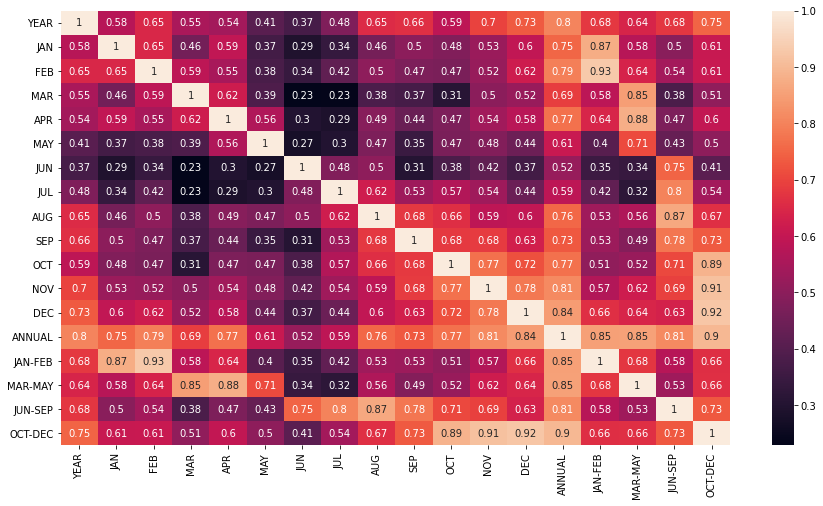

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot = True)

In [16]:
%matplotlib inline
import seaborn as sns

Text(0.5, 1.0, 'Temperature of month january')

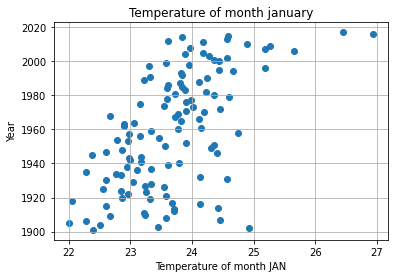

In [8]:
plt.scatter(df['JAN'],df['YEAR'])
plt.grid(True)
plt.xlabel("Temperature of month JAN")
plt.ylabel("Year")
plt.title("Temperature of month january")

## Spliting Dataset

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_data,test_data = train_test_split(df,test_size=0.2,random_state=42)
print(f"Rows in train set: {len(train_data)}\nRows in test set: {len(test_data)}")

x_train = train_data[["YEAR"]].copy()
y_train = train_data['JAN'].copy()
x_test = test_data[["YEAR"]].copy()
y_test = test_data['JAN'].copy()

Rows in train set: 93
Rows in test set: 24


## Model Building and Training

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

## Evaluating Model

In [12]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y = y_pred.round(decimals=2)
mse = mean_squared_error(y_test,y)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y)
rsqr = r2_score(y_test,y)

train_score = model.score(x_train,y_train)
test_score = model.score(x_test,y_test)

In [13]:
print("Linear Regression : ")
print("\nMean square error : ",mse)
print("Root mean squared error : ",rmse)
print("\nMean absolute error : ",mae)
print("R-Squared : ",rsqr)

Linear Regression : 

Mean square error :  0.5559750000000009
Root mean squared error :  0.7456373112981947

Mean absolute error :  0.5083333333333337
R-Squared :  0.46087481479448766


In [14]:
y = y_pred.round(decimals=2)
dict = {"Actual":y_test,"Predicted":y}
df_new = pd.DataFrame(dict)
df_new.head()

,Actual,Predicted
44,22.38,23.51
4,22.00,23.03
53,22.79,23.62
42,22.97,23.49
10,23.22,23.10


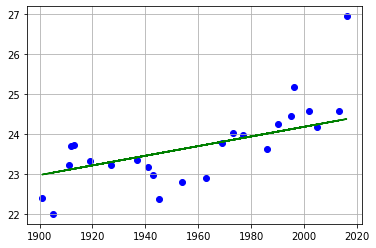

In [15]:
# plotting results for testing dataset
plt.scatter(x_test,y_test,color = "blue")
plt.grid(True)
plt.plot(x_test,y_pred,color = "Green")

## Visualizing simple regression model

In [20]:
from operator import mul

In [31]:
def compute_regcoef(x,y):
    n = len(x)
    sumxy = sum(list(map(mul,x,y)))
    num = n * sumxy - sum(x) * sum(y)
    sumxx = sum(list(map(mul,x,x)))
    denom = n*sumxx - sum(x)*sum(x)
    m = num/denom
    c = ( sum(y) - m * sum(x))/n
    
    return(c,m)

In [32]:
def plot_regline(x,y,b):
    plt.scatter(x,y,color = 'b',marker = 'o',s=30)
    y_pred = np.float_(x)*b[1]+b[0]
    plt.plot(x,y_pred,color ='g')
    plt.xlabel('X-independent variable')
    plt.ylabel('Y-dependent variable')
    plt.show()

Intercept 0.0
slope 1.0


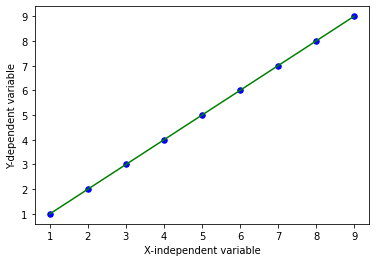

In [33]:
x = [1,2,3,4,5,6,7,8,9]
y = [1,2,3,4,5,6,7,8,9]

b = compute_regcoef(x,y)
type(b)
print('Intercept',b[0])
print('slope',b[1])
plot_regline(x,y,b)
